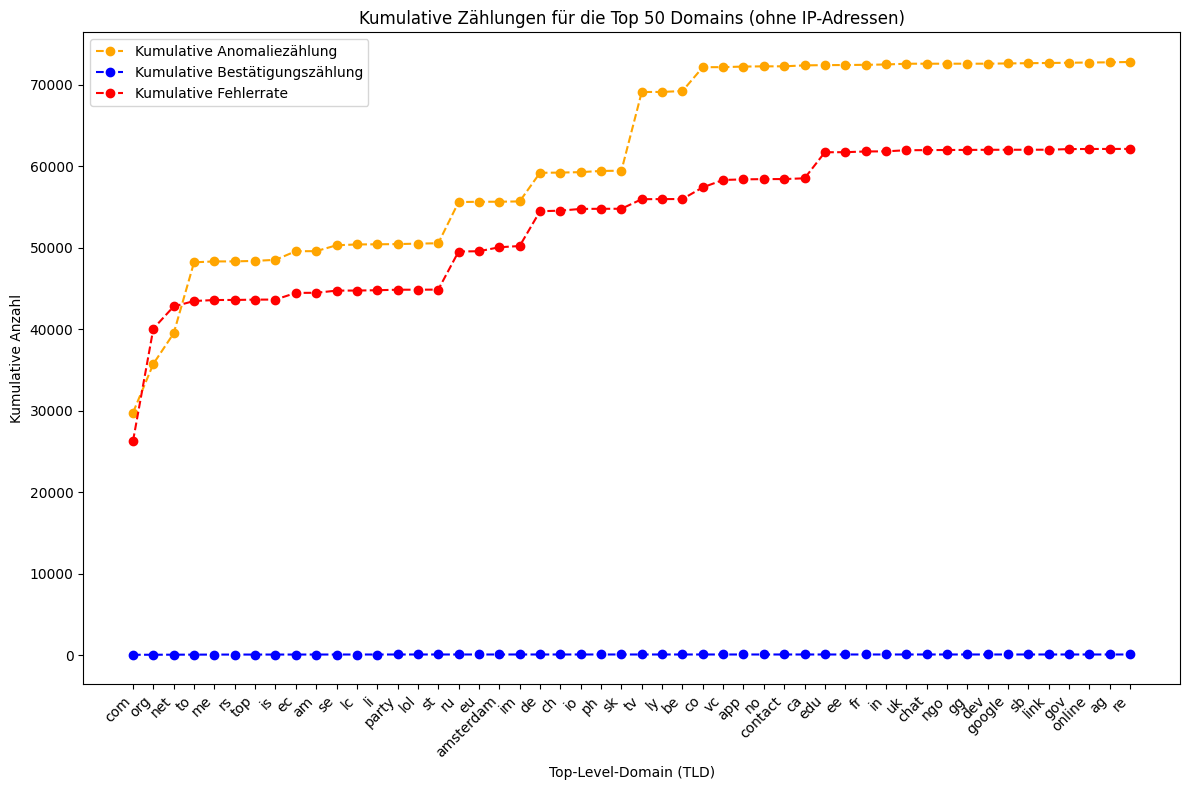

In [1]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Funktion zur Überprüfung, ob die Domain eine IP-Adresse ist
def is_ip_address(domain):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(domain))

# Gruppieren der Daten nach der Top-Level-Domain (TLD) ohne IP-Adressen
grouped_data = defaultdict(lambda: {'anomaly_count': 0, 'confirmed_count': 0, 'failure_count': 0})

for entry in data['result']:
    domain = entry['domain']
    tld = domain.split('.')[-1]  # Extrahieren der Top-Level-Domain
    if not is_ip_address(domain):  # Überprüfen, ob die Domain eine IP-Adresse ist
        anomaly_count = entry['anomaly_count']
        confirmed_count = entry['confirmed_count']
        failure_count = entry['failure_count']
        grouped_data[tld]['anomaly_count'] += anomaly_count
        grouped_data[tld]['confirmed_count'] += confirmed_count
        grouped_data[tld]['failure_count'] += failure_count

# Sortieren der Daten nach der aggregierten confirmed_count
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1]['confirmed_count'], reverse=True)

# Extrahieren der Top-Level-Domains
top_tlds = [entry[0] for entry in sorted_data[:50]]
top_anomaly_counts = [entry[1]['anomaly_count'] for entry in sorted_data[:50]]
top_confirmed_counts = [entry[1]['confirmed_count'] for entry in sorted_data[:50]]
top_failure_counts = [entry[1]['failure_count'] for entry in sorted_data[:50]]

# Berechnen der kumulierten Summe der counts
cumulative_anomaly_counts = [sum(top_anomaly_counts[:i+1]) for i in range(len(top_anomaly_counts))]
cumulative_confirmed_counts = [sum(top_confirmed_counts[:i+1]) for i in range(len(top_confirmed_counts))]
cumulative_failure_counts = [sum(top_failure_counts[:i+1]) for i in range(len(top_failure_counts))]

# Erstellen der Darstellung
plt.figure(figsize=(12, 8))
plt.plot(top_tlds, cumulative_anomaly_counts, color='orange', marker='o', label='Kumulative Anomaliezählung', linestyle='dashed')
plt.plot(top_tlds, cumulative_confirmed_counts, color='blue', marker='o', label='Kumulative Bestätigungszählung', linestyle='dashed')
plt.plot(top_tlds, cumulative_failure_counts, color='red', marker='o', label='Kumulative Fehlerrate', linestyle='dashed')

plt.xlabel('Top-Level-Domain (TLD)')
plt.ylabel('Kumulative Anzahl')
plt.title('Kumulative Zählungen für die Top 50 Domains (ohne IP-Adressen)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


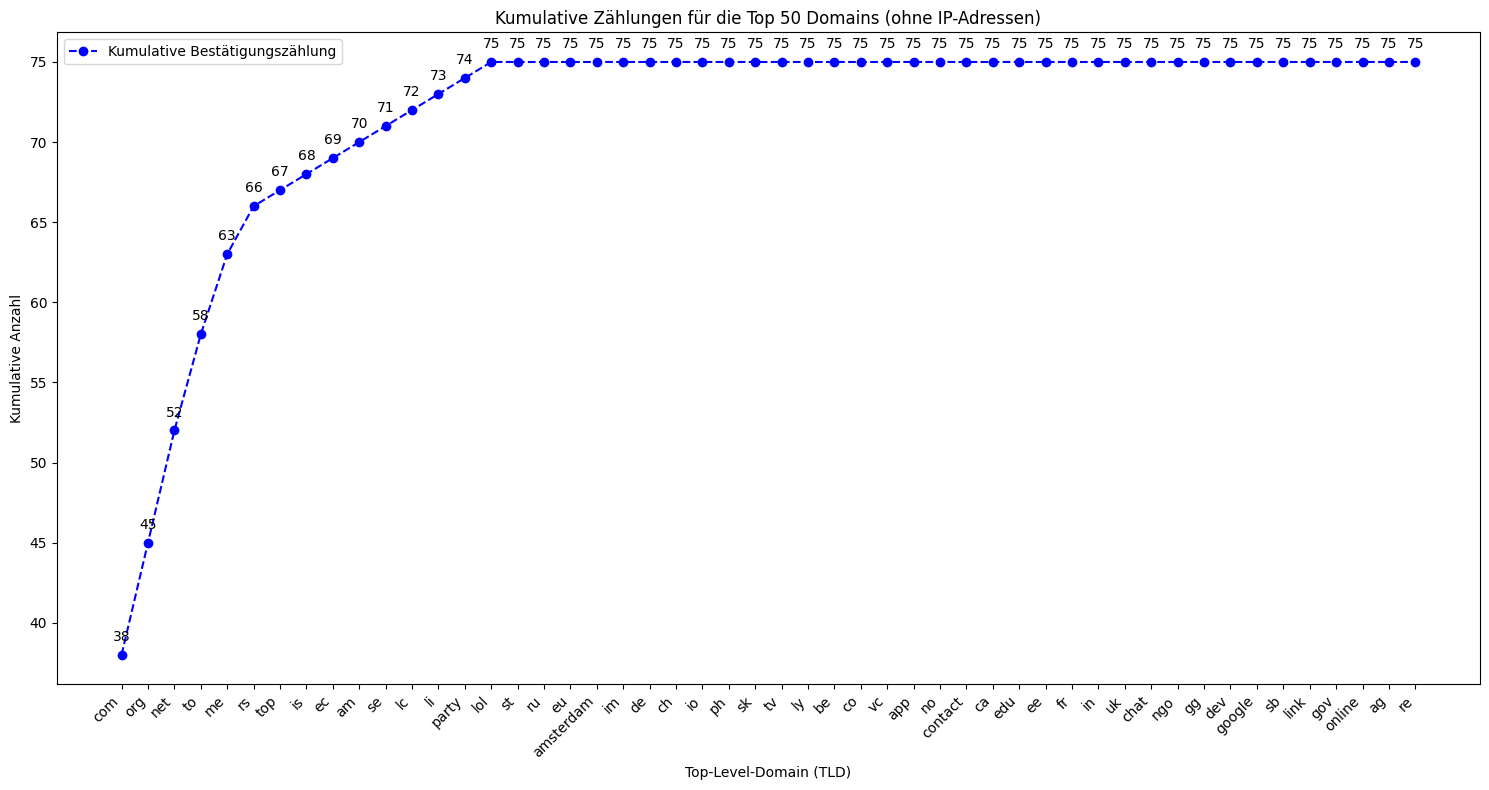

In [2]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Funktion zur Überprüfung, ob die Domain eine IP-Adresse ist
def is_ip_address(domain):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(domain))

# Gruppieren der Daten nach der Top-Level-Domain (TLD) ohne IP-Adressen
grouped_data = defaultdict(lambda: {'anomaly_count': 0, 'confirmed_count': 0, 'failure_count': 0})

for entry in data['result']:
    domain = entry['domain']
    tld = domain.split('.')[-1]
    if not is_ip_address(domain):
        anomaly_count = entry['anomaly_count']
        confirmed_count = entry['confirmed_count']
        failure_count = entry['failure_count']
        grouped_data[tld]['anomaly_count'] += anomaly_count
        grouped_data[tld]['confirmed_count'] += confirmed_count
        grouped_data[tld]['failure_count'] += failure_count

# Sortieren der Daten nach der aggregierten confirmed_count
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1]['confirmed_count'], reverse=True)

# Extrahieren der Top-Level-Domains
top_tlds = [entry[0] for entry in sorted_data[:50]]
top_anomaly_counts = [entry[1]['anomaly_count'] for entry in sorted_data[:50]]
top_confirmed_counts = [entry[1]['confirmed_count'] for entry in sorted_data[:50]]
top_failure_counts = [entry[1]['failure_count'] for entry in sorted_data[:50]]

# Berechnen der kumulierten Summe der counts
cumulative_anomaly_counts = [sum(top_anomaly_counts[:i+1]) for i in range(len(top_anomaly_counts))]
cumulative_confirmed_counts = [sum(top_confirmed_counts[:i+1]) for i in range(len(top_confirmed_counts))]
cumulative_failure_counts = [sum(top_failure_counts[:i+1]) for i in range(len(top_failure_counts))]

# Erstellen der Darstellung
plt.figure(figsize=(15, 8))
plt.plot(top_tlds, cumulative_confirmed_counts, color='blue', marker='o', label='Kumulative Bestätigungszählung', linestyle='dashed')

# Hinzufügen der Annotation
for i, txt in enumerate(cumulative_confirmed_counts):
    plt.annotate(txt, (top_tlds[i], cumulative_confirmed_counts[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Top-Level-Domain (TLD)')
plt.ylabel('Kumulative Anzahl')
plt.title('Kumulative Zählungen für die Top 50 Domains (ohne IP-Adressen)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


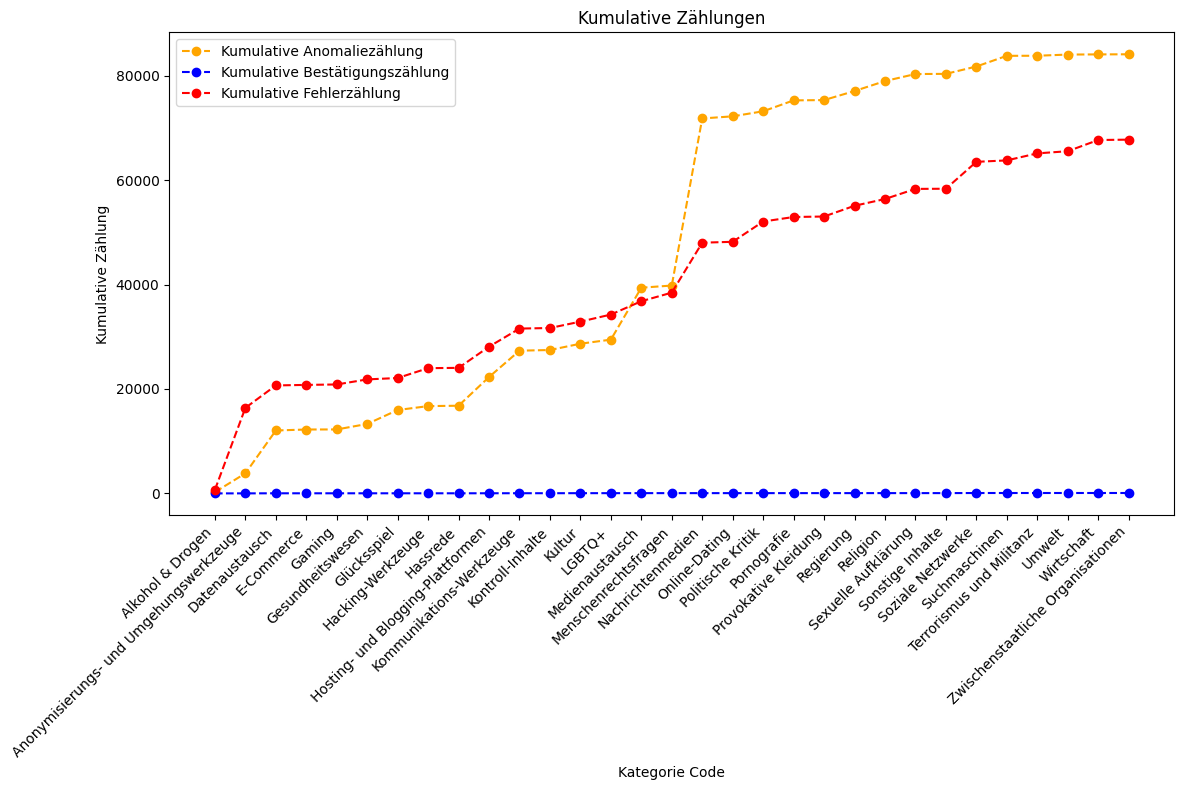

In [4]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=category_code&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Wörterbuch für die Übersetzungen der Abkürzungen
translation_dict = {
    'ALDR': 'Alkohol & Drogen',
    'ANON': 'Anonymisierungs- und Umgehungswerkzeuge',
    'FILE': 'Datenaustausch',
    'COMM': 'E-Commerce',
    'GAME': 'Gaming',
    'PUBH': 'Gesundheitswesen',
    'GMB': 'Glücksspiel',
    'HACK': 'Hacking-Werkzeuge',
    'HATE': 'Hassrede',
    'HOST': 'Hosting- und Blogging-Plattformen',
    'COMT': 'Kommunikations-Werkzeuge',
    'CTRL': 'Kontroll-Inhalte',
    'CULTR': 'Kultur',
    'LGBT': 'LGBTQ+',
    'MMED': 'Medienaustausch',
    'HUMR': 'Menschenrechtsfragen',
    'NEWS': 'Nachrichtenmedien',
    'DATE': 'Online-Dating',
    'POLR': 'Politische Kritik',
    'PORN': 'Pornografie',
    'PROV': 'Provokative Kleidung',
    'GOVT': 'Regierung',
    'XED': 'Sexuelle Aufklärung',
    'MISC': 'Sonstige Inhalte',
    'GRP': 'Soziale Netzwerke',
    'SRCH': 'Suchmaschinen',
    'MILX': 'Terrorismus und Militanz',
    'ENV': 'Umwelt',
    'ECON': 'Wirtschaft',
    'IGO': 'Zwischenstaatliche Organisationen',
    'REL': 'Religion',
}

# Gruppieren der Daten nach der Kategorie (category_code)
grouped_data = defaultdict(lambda: {'anomaly_count': 0, 'confirmed_count': 0, 'failure_count': 0})

for entry in data['result']:
    category_code = entry['category_code']
    anomaly_count = entry['anomaly_count']
    confirmed_count = entry['confirmed_count']
    failure_count = entry['failure_count']
    grouped_data[category_code]['anomaly_count'] += anomaly_count
    grouped_data[category_code]['confirmed_count'] += confirmed_count
    grouped_data[category_code]['failure_count'] += failure_count

# Sortieren der Daten nach der aggregierten confirmed_count
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1]['confirmed_count'], reverse=True)

# Extrahieren der Kategorien
top_categories = [translation_dict.get(entry[0], entry[0]) for entry in sorted_data]
top_anomaly_counts = [entry[1]['anomaly_count'] for entry in sorted_data]
top_confirmed_counts = [entry[1]['confirmed_count'] for entry in sorted_data]
top_failure_counts = [entry[1]['failure_count'] for entry in sorted_data]

# Verbindung von Kategorie und Zählungen
category_counts = list(zip(top_categories, top_anomaly_counts, top_confirmed_counts, top_failure_counts))

# Sortieren basierend auf den übersetzten Kategorien
sorted_category_counts = sorted(category_counts, key=lambda x: translation_dict.get(x[0], x[0]))

# Extrahieren der sortierten Kategorien und Zählungen
sorted_categories, sorted_anomaly_counts, sorted_confirmed_counts, sorted_failure_counts = zip(*sorted_category_counts)

# Berechnen der kumulierten Summe der counts
cumulative_anomaly_counts = [sum(sorted_anomaly_counts[:i+1]) for i in range(len(sorted_anomaly_counts))]
cumulative_confirmed_counts = [sum(sorted_confirmed_counts[:i+1]) for i in range(len(sorted_confirmed_counts))]
cumulative_failure_counts = [sum(sorted_failure_counts[:i+1]) for i in range(len(sorted_failure_counts))]

# Erstellen der Darstellung
plt.figure(figsize=(12, 8))
plt.plot(sorted_categories, cumulative_anomaly_counts, color='orange', marker='o', label='Kumulative Anomaliezählung', linestyle='dashed')
plt.plot(sorted_categories, cumulative_confirmed_counts, color='blue', marker='o', label='Kumulative Bestätigungszählung', linestyle='dashed')
plt.plot(sorted_categories, cumulative_failure_counts, color='red', marker='o', label='Kumulative Fehlerzählung', linestyle='dashed')

plt.xlabel('Kategorie Code')
plt.ylabel('Kumulative Zählung')
plt.title('Kumulative Zählungen')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


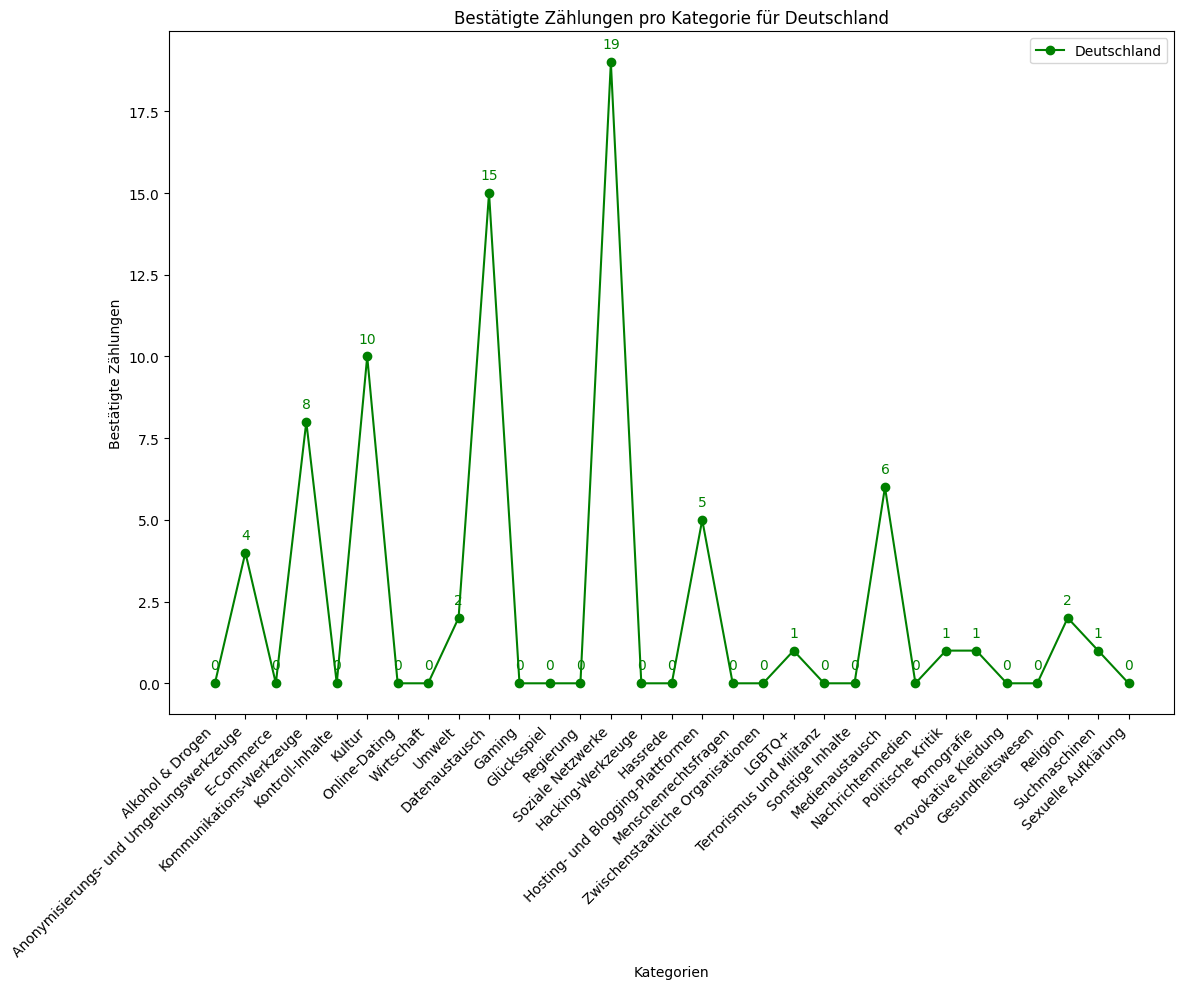

In [5]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=category_code&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Wörterbuch für die Übersetzungen der Abkürzungen
translation_dict = {
    'ALDR': 'Alkohol & Drogen',
    'ANON': 'Anonymisierungs- und Umgehungswerkzeuge',
    'FILE': 'Datenaustausch',
    'COMM': 'E-Commerce',
    'GAME': 'Gaming',
    'PUBH': 'Gesundheitswesen',
    'GMB': 'Glücksspiel',
    'HACK': 'Hacking-Werkzeuge',
    'HATE': 'Hassrede',
    'HOST': 'Hosting- und Blogging-Plattformen',
    'COMT': 'Kommunikations-Werkzeuge',
    'CTRL': 'Kontroll-Inhalte',
    'CULTR': 'Kultur',
    'LGBT': 'LGBTQ+',
    'MMED': 'Medienaustausch',
    'HUMR': 'Menschenrechtsfragen',
    'NEWS': 'Nachrichtenmedien',
    'DATE': 'Online-Dating',
    'POLR': 'Politische Kritik',
    'PORN': 'Pornografie',
    'PROV': 'Provokative Kleidung',
    'GOVT': 'Regierung',
    'XED': 'Sexuelle Aufklärung',
    'MISC': 'Sonstige Inhalte',
    'GRP': 'Soziale Netzwerke',
    'SRCH': 'Suchmaschinen',
    'MILX': 'Terrorismus und Militanz',
    'ENV': 'Umwelt',
    'ECON': 'Wirtschaft',
    'IGO': 'Zwischenstaatliche Organisationen',
    'REL': 'Religion',
}

# Gruppieren der Daten nach der Kategorie (category_code) für China
grouped_data = defaultdict(int)

for entry in data['result']:
    category_code = entry['category_code']
    confirmed_count = entry['confirmed_count']
    grouped_data[category_code] += confirmed_count

# Sortieren der Daten nach der gewünschten Reihenfolge
sorted_data = sorted(grouped_data.items())

# Extrahieren der Kategorien und kumulierten Zählungen für China in gewünschter Reihenfolge
categories = [translation_dict.get(entry[0], entry[0]) for entry in sorted_data]
germany_counts = [entry[1] for entry in sorted_data]

# Erstellen der Darstellung
plt.figure(figsize=(12, 10))
plt.plot(categories, germany_counts, marker='o', label='Deutschland', color='green')

# Hinzufügen von Annotationszahlen für Deutschland
for i, count in enumerate(germany_counts):
    plt.annotate(str(count), (categories[i], germany_counts[i]), textcoords="offset points", xytext=(0, 10), ha='center', color= 'green')

plt.xlabel('Kategorien')
plt.ylabel('Bestätigte Zählungen')
plt.title('Bestätigte Zählungen pro Kategorie für Deutschland')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


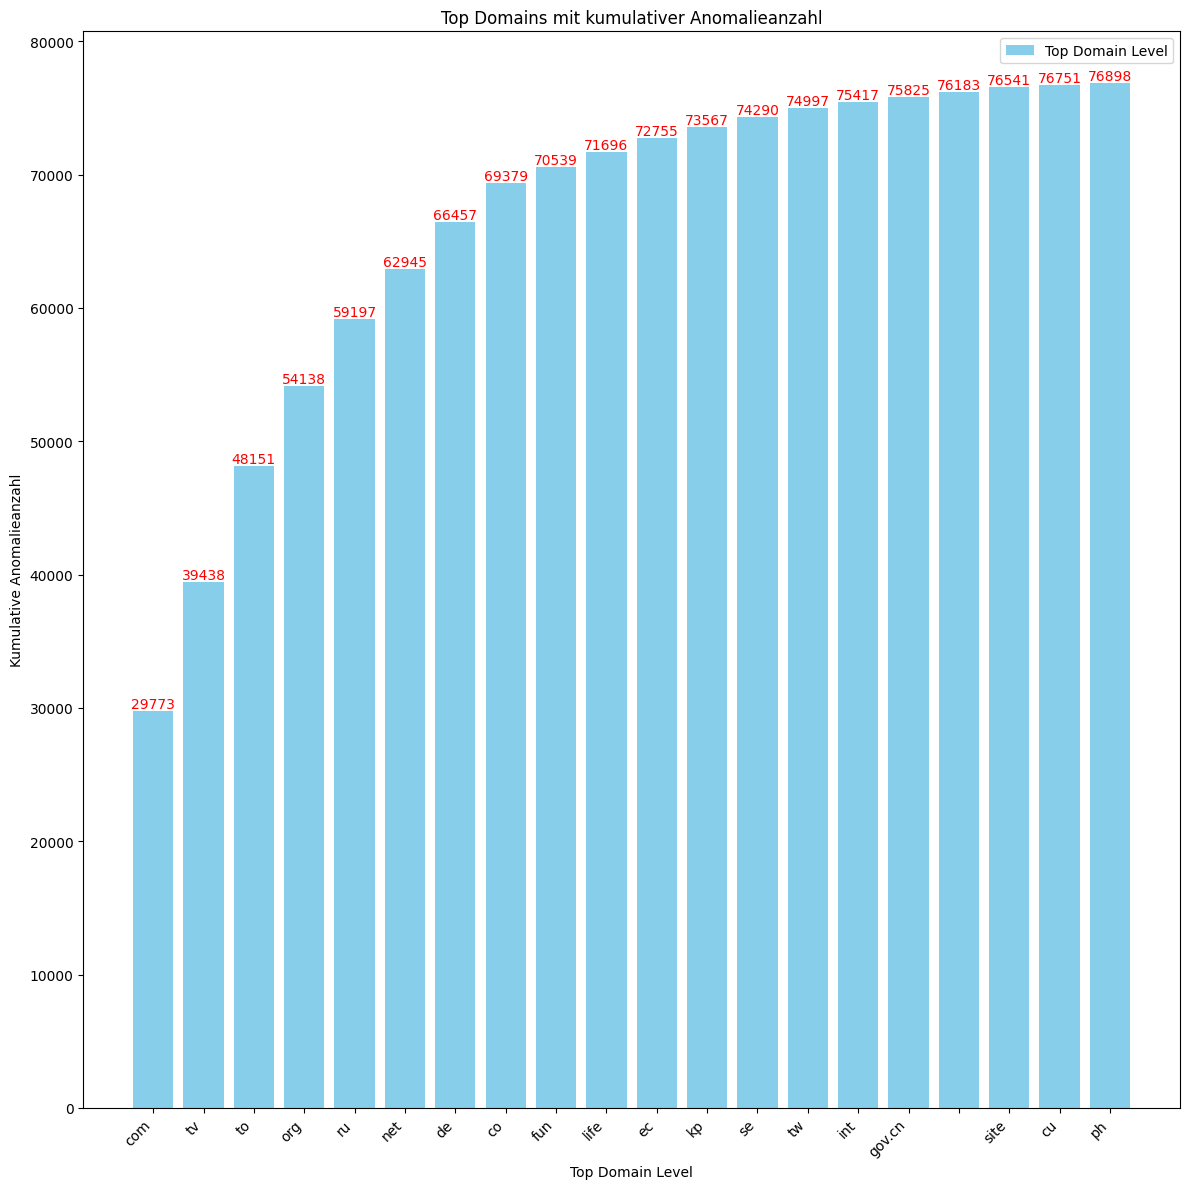

In [6]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import tldextract
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Gruppieren der Daten nach der Domain
grouped_data = defaultdict(int)

for entry in data['result']:
    full_domain = entry['domain']
    anomaly_count = entry['anomaly_count']

    # Extrahieren der Endziffern der Domain mit tldextract
    extracted_domain = tldextract.extract(full_domain)
    end_digits = extracted_domain.suffix

    grouped_data[end_digits] += anomaly_count

# Sortieren der Daten nach der aggregierten Anomalieanzahl
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1], reverse=True)

# Extrahieren der Top-Daten
top_end_digits = [entry[0] for entry in sorted_data[:20]]
top_anomaly_counts = [entry[1] for entry in sorted_data[:20]]

# Berechnen der kumulierten Summe der Anomalieanzahl
cumulative_counts = [sum(top_anomaly_counts[:i+1]) for i in range(len(top_anomaly_counts))]

# Erstellen der Darstellung mit größerer Größe
plt.figure(figsize=(12, 12))

# Plot für Top-Endziffern
plt.bar(top_end_digits, cumulative_counts, color='skyblue', label='Top Domain Level')

plt.xlabel('Top Domain Level')
plt.ylabel('Kumulative Anomalieanzahl')
plt.title('Top Domains mit kumulativer Anomalieanzahl')
plt.xticks(rotation=45, ha='right')

# Anmerkungen hinzufügen
for i, count in enumerate(cumulative_counts):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='red')

plt.legend()
plt.tight_layout()
plt.show()


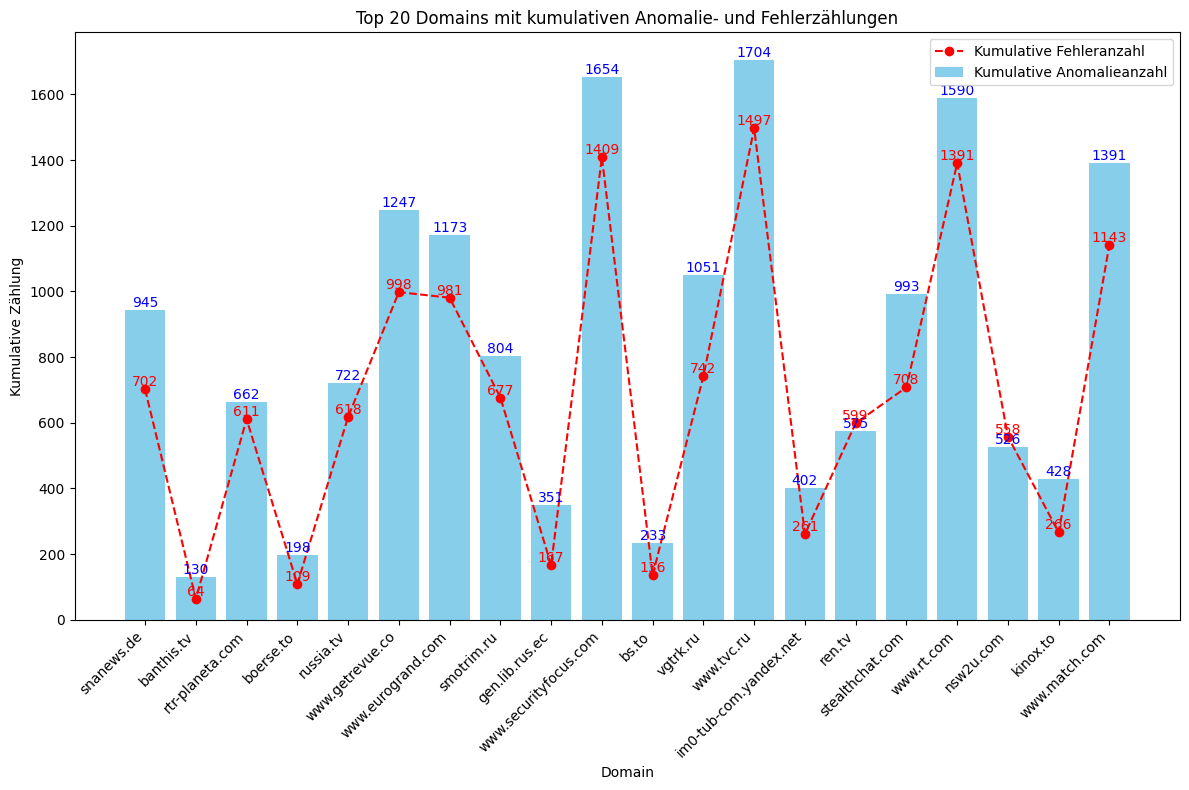

In [8]:
import json
import matplotlib.pyplot as plt
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Gruppieren der Daten nach der Domain
grouped_data = {entry['domain']: entry for entry in data['result']}

# Extrahieren der aggregierten Anomalieanzahl und Fehleranzahl für jede Domain
domains = list(grouped_data.keys())
anomaly_counts = [entry['anomaly_count'] for entry in grouped_data.values()]
failure_counts = [entry['failure_count'] for entry in grouped_data.values()]

# Berechnen der kumulierten Anomalieanzahl und Fehleranzahl
cumulative_anomaly_counts = [sum(anomaly_counts[:i+1]) for i in range(len(anomaly_counts))]
cumulative_failure_counts = [sum(failure_counts[:i+1]) for i in range(len(failure_counts))]

# Sortieren der Daten nach der aggregierten Anomalieanzahl
sorted_indices = sorted(range(len(anomaly_counts)), key=lambda k: anomaly_counts[k], reverse=True)
domains = [domains[i] for i in sorted_indices]
anomaly_counts = [anomaly_counts[i] for i in sorted_indices]
failure_counts = [failure_counts[i] for i in sorted_indices]
cumulative_anomaly_counts = [cumulative_anomaly_counts[i] for i in sorted_indices]
cumulative_failure_counts = [cumulative_failure_counts[i] for i in sorted_indices]

# Erstellen der Darstellung
plt.figure(figsize=(12, 8))
plt.bar(domains[:20], cumulative_anomaly_counts[:20], color='skyblue', label='Kumulative Anomalieanzahl')
plt.plot(domains[:20], cumulative_failure_counts[:20], color='red', marker='o', label='Kumulative Fehleranzahl', linestyle='dashed')
plt.xlabel('Domain')
plt.ylabel('Kumulative Zählung')
plt.title('Top 20 Domains mit kumulativen Anomalie- und Fehlerzählungen')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Anmerkungen hinzufügen
for i, count in enumerate(cumulative_anomaly_counts[:20]):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='blue')

for i, count in enumerate(cumulative_failure_counts[:20]):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()


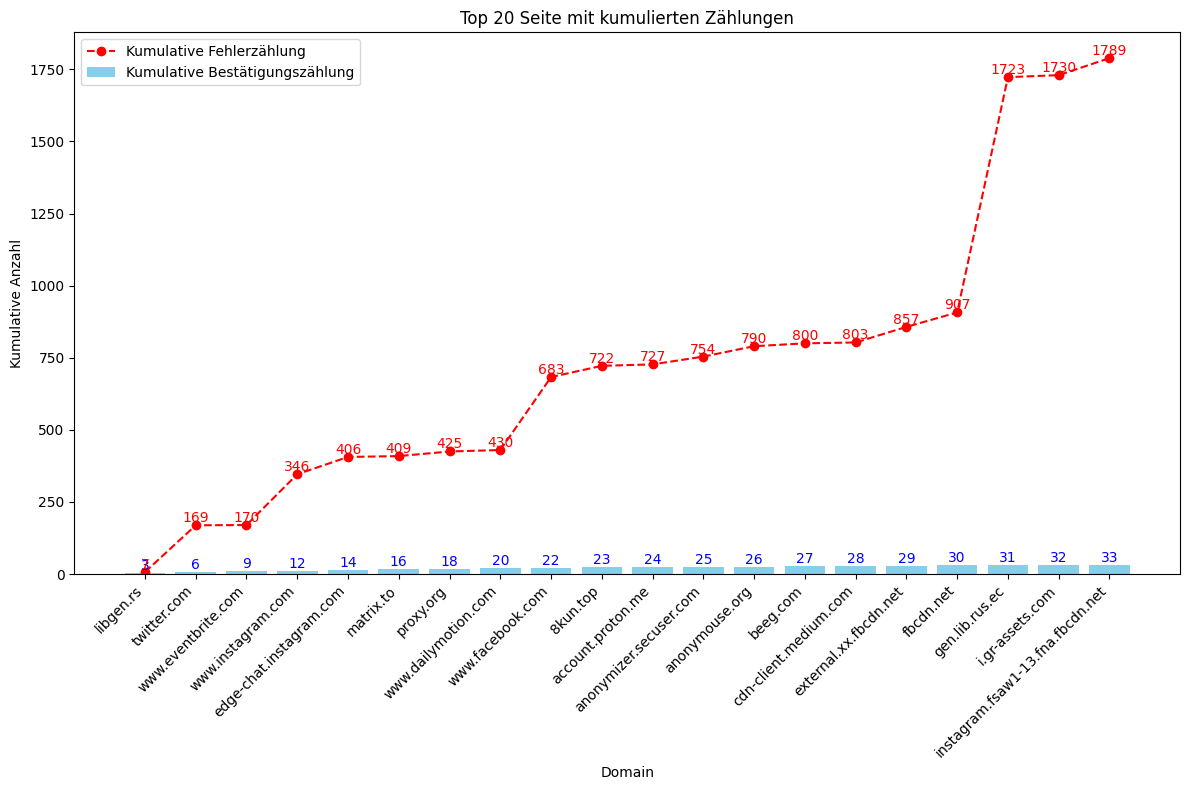

In [9]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Gruppieren der Daten nach der Domain
grouped_data = defaultdict(lambda: {'confirmed_count': 0, 'failure_count': 0})

for entry in data['result']:
    domain = entry['domain']
    confirmed_count = entry['confirmed_count']
    failure_count = entry['failure_count']
    grouped_data[domain]['confirmed_count'] += confirmed_count
    grouped_data[domain]['failure_count'] += failure_count

# Sortieren der Daten nach der aggregierten confirmed_count
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1]['confirmed_count'], reverse=True)

# Extrahieren der Top 20 Daten
top_domains = [entry[0] for entry in sorted_data[:20]]
top_confirmed_counts = [entry[1]['confirmed_count'] for entry in sorted_data[:20]]
top_failure_counts = [entry[1]['failure_count'] for entry in sorted_data[:20]]

# Berechnen der kumulierten Summe der confirmed_count und failure_count
cumulative_confirmed_counts = [sum(top_confirmed_counts[:i+1]) for i in range(len(top_confirmed_counts))]
cumulative_failure_counts = [sum(top_failure_counts[:i+1]) for i in range(len(top_failure_counts))]

# Erstellen der Darstellung
plt.figure(figsize=(12, 8))
plt.bar(top_domains, cumulative_confirmed_counts, color='skyblue', label='Kumulative Bestätigungszählung')
plt.plot(top_domains, cumulative_failure_counts, color='red', marker='o', label='Kumulative Fehlerzählung', linestyle='dashed')
plt.xlabel('Domain')
plt.ylabel('Kumulative Anzahl')
plt.title('Top 20 Seite mit kumulierten Zählungen')
plt.xticks(rotation=45, ha='right')

# Anmerkungen hinzufügen
for i, count in enumerate(cumulative_confirmed_counts):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='blue')

for i, count in enumerate(cumulative_failure_counts):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='red')

plt.legend()
plt.tight_layout()
plt.show()


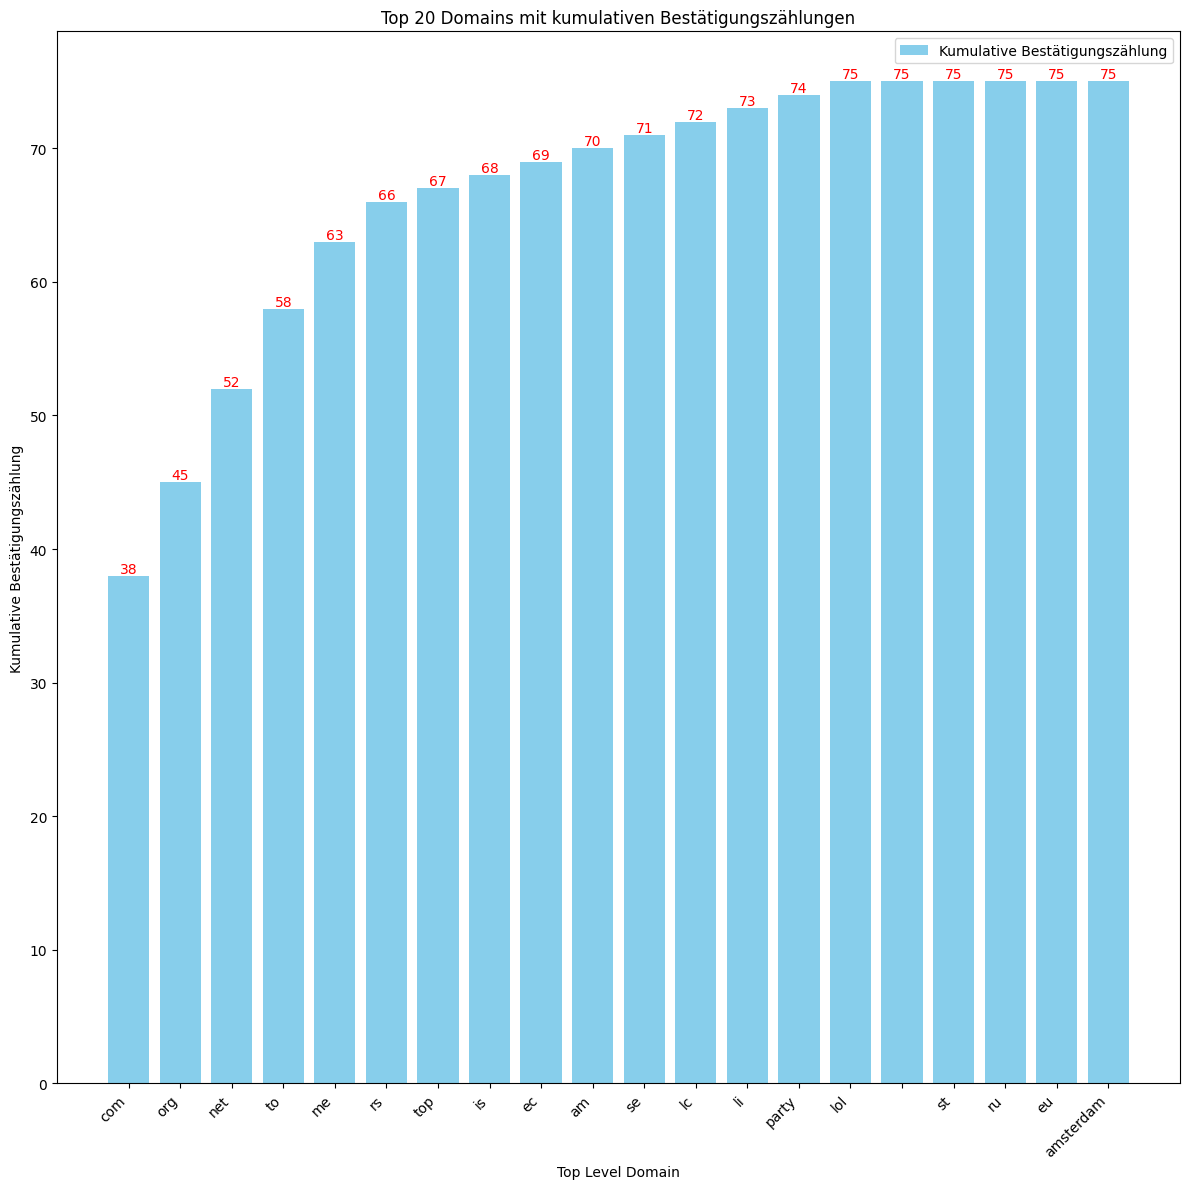

In [10]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import tldextract
import requests

# API URL
url = 'https://api.ooni.io/api/v1/aggregation?probe_cc=DE&since=2024-03-16&until=2024-04-16&time_grain=day&axis_x=measurement_start_day&axis_y=domain&test_name=web_connectivity'

# Daten von der OONI API laden
response = requests.get(url)
data = response.json()

# Gruppieren der Daten nach der Domain
grouped_data = defaultdict(int)

for entry in data['result']:
    full_domain = entry['domain']
    confirmed_count = entry['confirmed_count']

    # Extrahieren der Endziffern der Domain mit tldextract
    extracted_domain = tldextract.extract(full_domain)
    end_digits = extracted_domain.suffix

    grouped_data[end_digits] += confirmed_count

# Sortieren der Daten nach der aggregierten confirmed_count
sorted_data = sorted(grouped_data.items(), key=lambda x: x[1], reverse=True)

# Extrahieren der Top-Daten
top_end_digits = [entry[0] for entry in sorted_data[:20]]
top_confirmed_counts = [entry[1] for entry in sorted_data[:20]]

# Berechnen der kumulierten Summe der confirmed_count
cumulative_counts = [sum(top_confirmed_counts[:i+1]) for i in range(len(top_confirmed_counts))]

# Erstellen der Darstellung mit größerer Größe
plt.figure(figsize=(12, 12))

# Plot für Top-Endziffern
plt.bar(top_end_digits, cumulative_counts, color='skyblue', label='Kumulative Bestätigungszählung')

plt.xlabel('Top Level Domain')
plt.ylabel('Kumulative Bestätigungszählung')
plt.title('Top 20 Domains mit kumulativen Bestätigungszählungen')
plt.xticks(rotation=45, ha='right')

# Anmerkungen hinzufügen
for i, count in enumerate(cumulative_counts):
    plt.annotate(f'{count}', (i, count), ha='center', va='bottom', color='red')

plt.legend()
plt.tight_layout()
plt.show()
